In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

sns.set_theme(style="whitegrid", font_scale=1.5)

# Analysis of Bias Symptoms

Selected Datasets:

- Biased Dataset: `Adult Income dataset`
- Unbiased Dataset: `Kickstarter Projects dataset`

Steps:

- Train a Logistic Regression classifier on the training set
- Predict the label on the testing set
- Select from the testing set only binary columns with a correlation with the predicted label $\geq 0.1$
- Compute the following metrics on the selected columns:
    - Correlation with the predicted label
    - Groups unbalance (defined as the ratio between expected and observed groups size)
    - Statistical parity
    - Equalized odds

## Biased Data

In [2]:
symptoms = pd.read_csv('symptoms_bias.csv', index_col=0)

In [3]:
symptoms.sort_values(by='statistical_parity', ascending=False, inplace=True)

In [4]:
symptoms['unbalance'] = abs(1-symptoms['unbalance'])

In [5]:
symptoms = symptoms.melt(
    id_vars=["variable"],
    value_vars=["correlation", "unbalance", "statistical_parity", "equalized_odds"],
    var_name="symptom",
)

In [6]:
symptoms['value'] = symptoms['value'].abs()

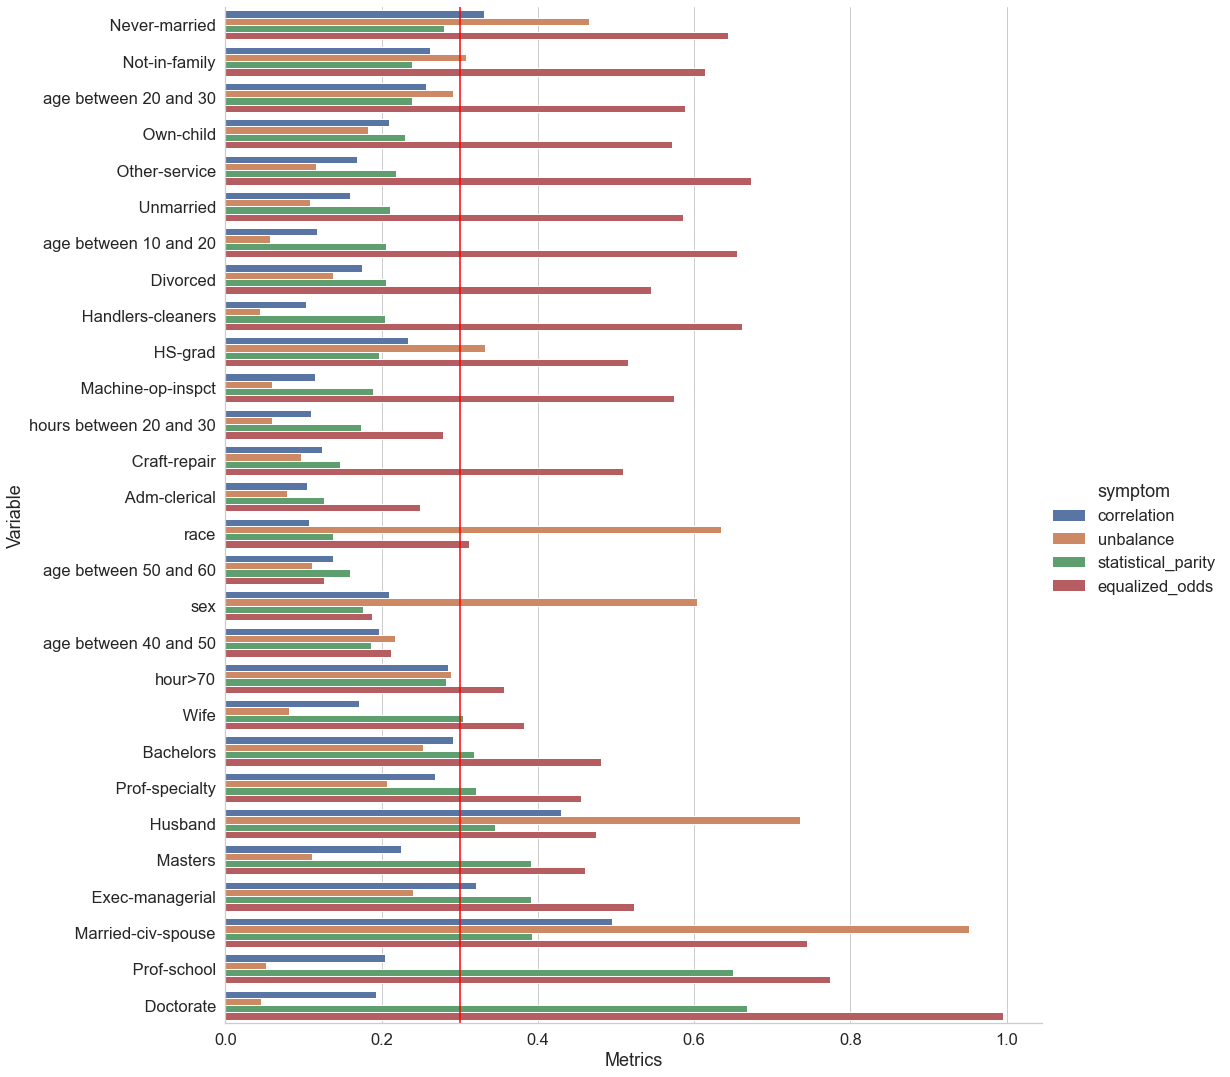

In [7]:
fig = sns.catplot(
    data=symptoms,
    y="variable",
    x="value",
    hue="symptom",
    kind="bar",
    height=15,
    aspect=1
)

plt.axvline(x=0.3, color='red')
plt.xlabel("Metrics")
plt.ylabel("Variable")
plt.show()

## Unbiased Data

In [11]:
symptoms_nob = pd.read_csv('symptoms_nobias.csv', index_col=0)

In [12]:
symptoms_nob.sort_values(by='statistical_parity', ascending=False, inplace=True)

In [13]:
symptoms_nob['unbalance'] = abs(1-symptoms['unbalance'])

In [14]:
symptoms_nob = symptoms_nob.melt(
    id_vars=["variable"],
    value_vars=["correlation", "unbalance", "statistical_parity", "equalized_odds"],
    var_name="symptom",
)

In [15]:
symptoms_nob['value'] = symptoms_nob['value'].abs()

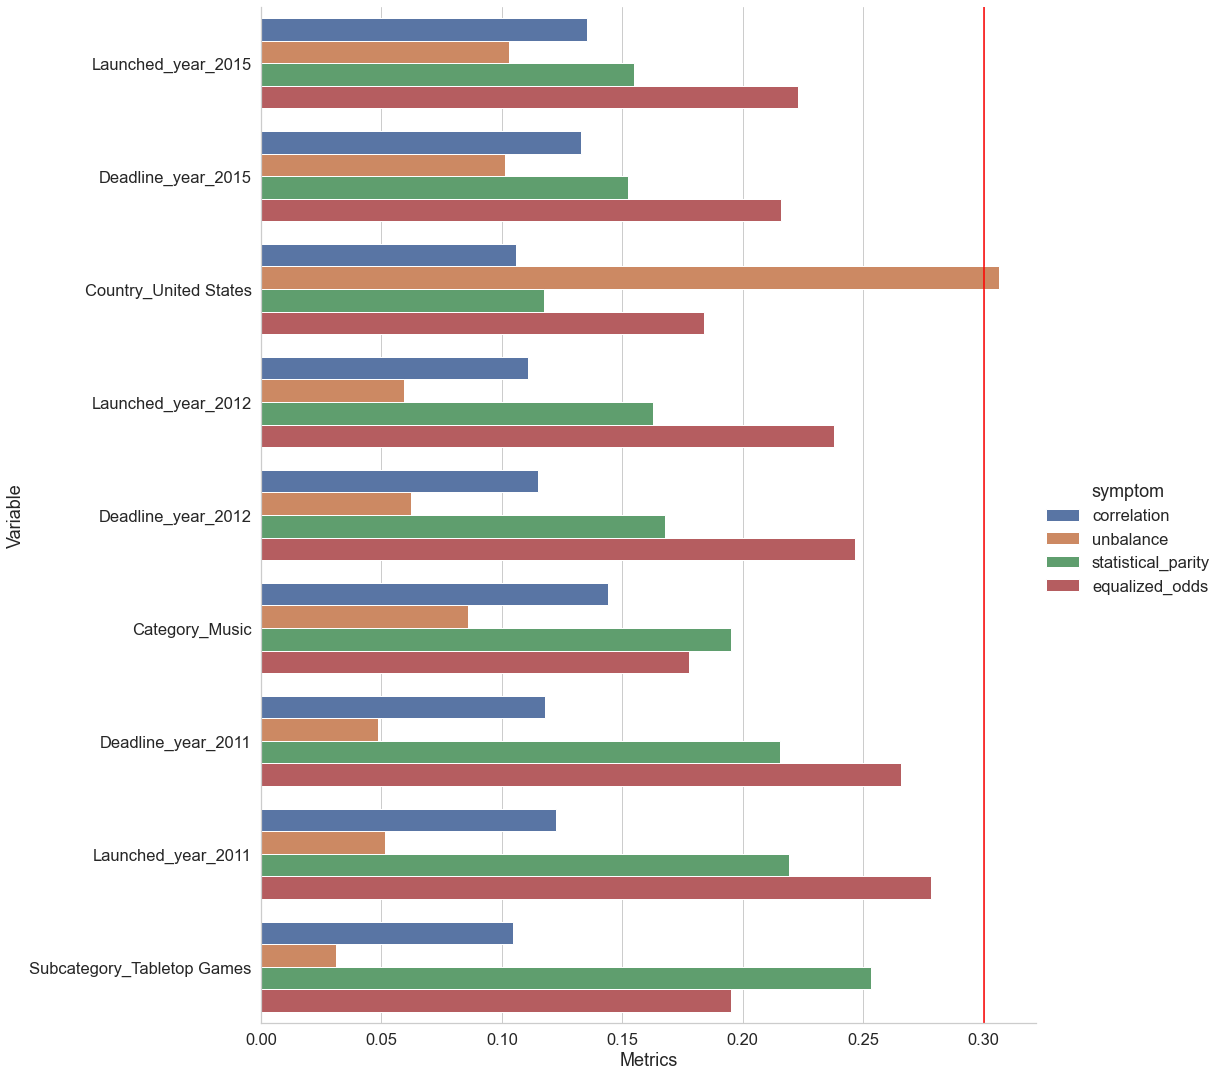

In [17]:
fig = sns.catplot(
    data=symptoms_nob,
    y="variable",
    x="value",
    hue="symptom",
    kind="bar",
    height=15,
    aspect=1
)

plt.axvline(x=0.3, color='red')
plt.xlabel("Metrics")
plt.ylabel("Variable")
plt.show()

## Correlation plots

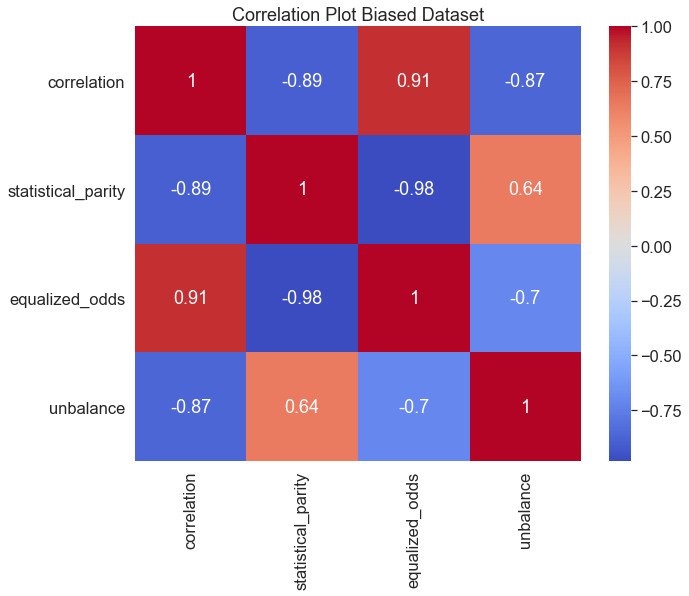

In [20]:
symptoms = pd.read_csv("symptoms_bias.csv", index_col=0)
correlation_matrix = symptoms.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Plot Biased Dataset")
plt.show()

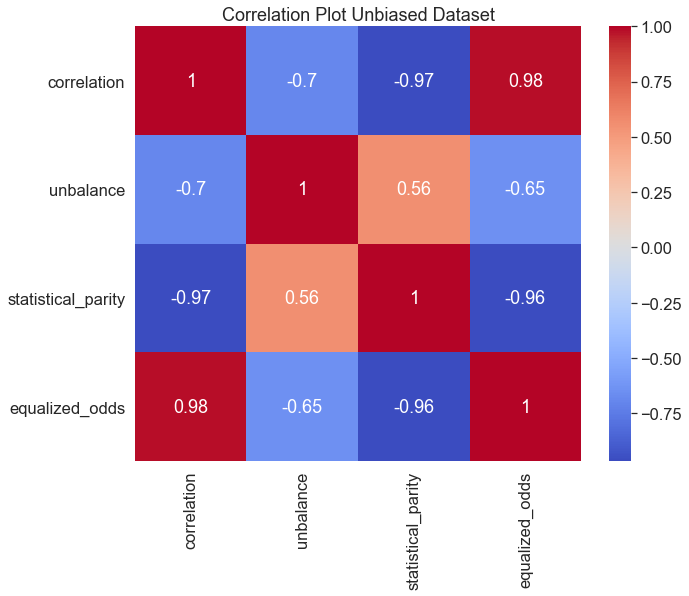

In [21]:
symptoms_nob = pd.read_csv("symptoms_nobias.csv", index_col=0)
correlation_matrix = symptoms_nob.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Plot Unbiased Dataset")
plt.show()